In [ ]:
"""L'esercizio è mirato a prendere confidenza con l'analisi dati in Python e in particolare con tutte le strutture dati viste, le funzioni e i costrutti principali.
Per eseguire l'esercizio è preferibile utilizzare come tool di programmazione Jupyter Lab, Jupyter Notebook o Colaboratory: in alternativa si potranno utilizzare IDE
quali PyCharm oppure Spyder.
Analisi diffusione COVID-19 nel mondo
Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, 
all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce
Downioad our complete COVID-19 dataset" scaricare il dataset in formato CSV oppure in formato JSON.
• Si richiede di verificare le dimensioni del dataset e le diciture presenti nell'intestazione.
• Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente.
• Sempre riguardo i casi di COVID totali, si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e che ne confronti i seguenti relativi descrittori statistici:
valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (in questo caso calcolati anche sulle locazioni senza indicazione di continente).
• Si chiede poi di effettuare lo stesso tipo di analisi - anche in questo caso sviluppando una funzione ad hoc - per il numero di vaccinazioni totali per ogni continente.
• Alla fine, basandosi sui calcoli fatti, il committente chiede di stilare un breve (tre o quattro righe) paragrafo testuale riassuntivo sulle statistiche di casi e vaccinazioni,
che si concentri solo sulle differenze esistenti tra Europa, Sud America e Oceania.
Per effettuare le analisi si potranno usare, a scelta, strumenti come funzioni e strutture dati built-in quali open. (), liste, dizionari;
moduli built-in quali cav o json; moduli esteri quali Pandas e i relativi metodi e tipi di dato."""

In [ ]:
import pandas as pd             #Abbiamo importato Pandas


In [ ]:
coviddata = pd.read_csv("owid-covid-data.csv")                  #Abbiamo assegnato una variabile per la ettura del dataset

In [ ]:
num_righe, num_colonne = coviddata.shape                                            #Abbiamo asseggnato una variabile per determinare le dimensioni del Dataset, e abbiamo fatto una print costruita per renderla leggibile
print(f'Dimensioni del dataset: {num_righe} righe x {num_colonne} colonne')

In [ ]:
intestazione = coviddata.head()                 #Abbiamo assegnato una variabile per determinare le prime 5 righe del dataset, comprese di intestazione, e abbiamo printato la variabile
print(intestazione)

In [ ]:
casi_per_continente = coviddata.groupby('continent')['total_cases'].sum()   #Con la variabile casi_per_continente, abbiamo calcolato i casi totali raggruppati per continente
casi_per_continente = casi_per_continente[casi_per_continente.index != 'N/D']
print(casi_per_continente)

In [ ]:
def confronta_descrittori(dataset, continente1, continente2, continente3):
    # Calcola il numero totale di casi nel mondo (inclusi quelli senza continente)
    casi_totali_mondo = coviddata['total_cases'].sum()
    
    # Filtra il dataset per i casi dei due continenti specificati
    casi_continente1 = coviddata[coviddata['continent'] == continente1]['total_cases'].sum()
    casi_continente2 = coviddata[coviddata['continent'] == continente2]['total_cases'].sum()
    casi_continente3 = coviddata[coviddata['continent'] == continente3]['total_cases'].sum()
    
    # Calcola i descrittori statistici
    minimo_continente1 = coviddata[coviddata['continent'] == continente1]['total_cases'].min()
    massimo_continente1 = coviddata[coviddata['continent'] == continente1]['total_cases'].max()
    media_continente1 = coviddata[coviddata['continent'] == continente1]['total_cases'].mean()
    percentuale_continente1 = (casi_continente1 / casi_totali_mondo) * 100
    
    minimo_continente2 = coviddata[coviddata['continent'] == continente2]['total_cases'].min()
    massimo_continente2 = coviddata[coviddata['continent'] == continente2]['total_cases'].max()
    media_continente2 = coviddata[coviddata['continent'] == continente2]['total_cases'].mean()
    percentuale_continente2 = (casi_continente2 / casi_totali_mondo) * 100

    minimo_continente3 = coviddata[coviddata['continent'] == continente3]['total_cases'].min()
    massimo_continente3 = coviddata[coviddata['continent'] == continente3]['total_cases'].max()
    media_continente3 = coviddata[coviddata['continent'] == continente3]['total_cases'].mean()
    percentuale_continente3 = (casi_continente3 / casi_totali_mondo) * 100
    
    # Crea un dizionario con i risultati
    risultati = {
        f"Minimo {continente1}": minimo_continente1,
        f"Massimo {continente1}": massimo_continente1,
        f"Media {continente1}": media_continente1,
        f"Percentuale {continente1} rispetto al mondo": percentuale_continente1,
        f"Minimo {continente2}": minimo_continente2,
        f"Massimo {continente2}": massimo_continente2,
        f"Media {continente2}": media_continente2,
        f"Percentuale {continente2} rispetto al mondo": percentuale_continente2,
        f"Minimo {continente3}": minimo_continente3,
        f"Massimo {continente3}": massimo_continente3,
        f"Media {continente3}": media_continente3,
        f"Percentuale {continente3} rispetto al mondo": percentuale_continente3,
    }
    
    return risultati

# Esempio di utilizzo della funzione
risultati = confronta_descrittori(coviddata, 'Europe', 'South America', 'Asia')
print(risultati)

In [ ]:
def confronta_vaccinazioni(dataset, continente1, continente2, continente3):
    # Calcola il numero totale di vaccinazioni nel mondo (inclusi quelli senza continente)
    vaccinazioni_totali_mondo = coviddata['total_vaccinations'].sum()
    
    # Filtra il dataset per le vaccinazioni dei due continenti specificati
    vaccinazioni_continente1 = coviddata[coviddata['continent'] == continente1]['total_vaccinations'].sum()
    vaccinazioni_continente2 = coviddata[coviddata['continent'] == continente2]['total_vaccinations'].sum()
    vaccinazioni_continente3 = coviddata[coviddata['continent'] == continente3]['total_vaccinations'].sum()
    
    # Crea un dizionario con i risultati
    risultati_vac = {
        f"Vaccinazioni totali {continente1}": vaccinazioni_continente1,
        f"Vaccinazioni totali {continente2}": vaccinazioni_continente2,
        f"Vaccinazioni totali {continente3}": vaccinazioni_continente3,

    }
    
    return risultati_vac

# Esempio di utilizzo della funzione
risultati_vac = confronta_vaccinazioni(coviddata, 'Europe', 'Asia', 'South America')
print(risultati_vac)


In [ ]:
import matplotlib.pyplot as plt

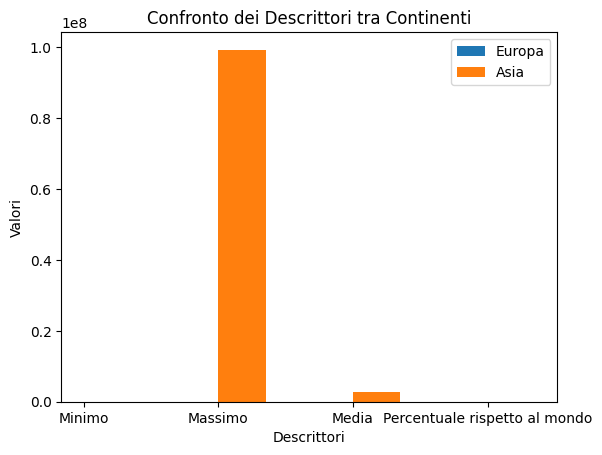

In [44]:
def confronta_descrittori_e_visualizza(dataset, continente1, continente2):
    # Calcola il numero totale di casi nel mondo (inclusi quelli senza continente)
    casi_totali_mondo = coviddata['total_cases'].sum()
    
    # Filtra il dataset per i casi dei due continenti specificati
    casi_continente1 = coviddata[coviddata['continent'] == continente1]['total_cases']
    casi_continente2 = coviddata[coviddata['continent'] == continente2]['total_cases']
    
    # Calcola i descrittori statistici per ciascun continente
    minimo_continente1 = casi_continente1.min()
    massimo_continente1 = casi_continente1.max()
    media_continente1 = casi_continente1.mean()
    percentuale_continente1 = (casi_continente1.sum() / casi_totali_mondo) * 100
    
    minimo_continente2 = casi_continente2.min()
    massimo_continente2 = casi_continente2.max()
    media_continente2 = casi_continente2.mean()
    percentuale_continente2 = (casi_continente2.sum() / casi_totali_mondo) * 100
    
    # Creare un grafico a barre per confrontare i risultati
    descrittori = ['Minimo', 'Massimo', 'Media', 'Percentuale rispetto al mondo']
    valori_continente1 = [minimo_continente1, massimo_continente1, media_continente1, percentuale_continente1]
    valori_continente2 = [minimo_continente2, massimo_continente2, media_continente2, percentuale_continente2]
    
    larghezza_barre = 0.35
    indici = range(len(descrittori))
    
    plt.bar(indici, valori_continente1, larghezza_barre, label=continente1)
    plt.bar([i + larghezza_barre for i in indici], valori_continente2, larghezza_barre, label=continente2)
    
    plt.xlabel('Descrittori')
    plt.ylabel('Valori')
    plt.title('Confronto dei Descrittori tra Continenti')
    plt.xticks([i + larghezza_barre / 2 for i in indici], descrittori)
    plt.legend()
    
    plt.show()

# Esempio di utilizzo della funzione

confronta_descrittori_e_visualizza(coviddata, 'Europa', 'Asia')


In [ ]:
"""
In base alle interrogazio fatte, possiamo vedere come l'Asia sia stato il continente con più casi registrati, subito seguito dall'Europa,
mentre il Sud America, risulta avere casi nettamente inferiori ai primi due continenti.

Se osserserviamo le vaccinazioni, invece, notiamo che l'Europa è il continente con il numero più alto di vaccinazioni, mentre Asia risulta essere l'ultimo dei tre.
"""